In [1]:
%config Completer.use_jedi = False
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from pandas.api.types import CategoricalDtype
import math
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
from collections import OrderedDict
import matplotlib
import seaborn as sns
from pylab import cm
from matplotlib.cbook import boxplot_stats
from matplotlib.legend_handler import HandlerTuple

from scipy.stats.mstats import hmean

from pprint import pprint
from IPython.display import display, HTML

import os
import subprocess
# import pickle
import dill as pickle  # Use dill instead of pickle
import warnings 
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
#Red
red1= sns.color_palette("Reds_d",1)
red2= sns.color_palette("Reds_d",2)
red3= sns.color_palette("Reds_d",3)
red4= sns.color_palette("Reds_d",4)
red5= sns.color_palette("Reds_d",5)
red6= sns.color_palette("Reds_d",6)
red7= sns.color_palette("Reds_d",7)
red8= sns.color_palette("Reds_d",8)

#YellowGreen
yg1= sns.color_palette("YlGn_d",1)
yg2= sns.color_palette("YlGn_d",2)
yg3= sns.color_palette("YlGn_d",3)
yg4= sns.color_palette("YlGn_d",4)
yg5= sns.color_palette("YlGn_d",5)
yg7= sns.color_palette("YlGn_d",7)

#GreenBlue
gb1= sns.color_palette("GnBu_d",1)
gb2= sns.color_palette("GnBu_d",2)
gb3= sns.color_palette("GnBu_d",3)
gb4= sns.color_palette("GnBu_d",4)
gb5= sns.color_palette("GnBu_d",5)
gb6= sns.color_palette("GnBu_d",6)
gb7= sns.color_palette("GnBu_d",7)
gb8= sns.color_palette("GnBu_d",8)

cp2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],gb7[4]]))
cp2v1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],yg7[0]]))
cp3 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],gb7[4],red7[2]]))
#cp4 = list(map(lambda x: sns.desaturate(x,0.9),red1+gb2+yg1))
cp2_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],gb7[4],gb7[6]]))
cp_total_spectrum = list(map(lambda x: sns.desaturate(x,0.9),gb7 + yg7 + red7))

#color_mine = colors(0)
#color_cublasxt = colors(2)
#color_ideal = colors(3)
#color_werk = colors1(2)

from pylab import cm
colors = cm.get_cmap('PuRd',  5)
colors_dark = cm.get_cmap('Dark2',  5)

viridis = cm.get_cmap('viridis',  4)
magma = cm.get_cmap('magma',  8)
# cp6 = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), red7[2], magma(6),  viridis(3), yg7[0], gb7[4]]))
cp6 = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), gb7[4], red7[2], magma(6),  viridis(3), yg7[0]]))

# Tesla-V100  colors(2)
# Tesla-A100  gb7[4] 
# AMD-EPYC-64    red7[2] 
# AMD-EPYC-24   magma(6)
# ARM-NEON    viridis(3)
# POWER9      colors_dark(1)
# Alveo-U280  yg7[0]
cp7 = list(map(lambda x: sns.desaturate(x,0.9),[colors(2), gb7[4], red7[2], magma(6), colors_dark(1), viridis(3), yg7[0]]))

cp5 = list(map(lambda x: sns.desaturate(x,0.9),[colors_dark(0), colors_dark(1), colors_dark(2), colors_dark(3), colors_dark(4)]))


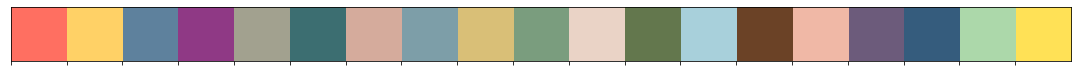

In [3]:
palette = ['#FF6F61','#FFD166','#5E819D','#8F3985','#A2A18F','#3C6E71','#D5AB9C','#7D9EA8','#D9BF77','#7A9D7E','#EAD3C6','#63774D','#A8D0DB','#6B4226','#F0B8A6','#6C5B7B','#355C7D','#ACD8AA','#FFE156']
sns.palplot(palette)
plt.show()

In [4]:
def change_colors(ranges_dev, color_dictionary):
    color_dictionary_custom = {k: v for k, v in color_dictionary.items() if k in ranges_dev}
    sns.set_palette(color_dictionary_custom.values())
    sns.color_palette()


# all devices that will be used
ranges_dev = [
    'NVIDIA-P100', 'NVIDIA-V100', 'NVIDIA-A100', 'NVIDIA-H100', 'AMD-MI250', 
    'AMD-EPYC-24', 'AMD-EPYC-64', 
    'INTEL-XEON-14', 'INTEL-ICY-16', 'INTEL-SAPPHIRE-56',
    'ARM-NEON-80', 'ARM-GRACE-72', 
    'IBM-POWER9-32']
ranges_dev_backup = ranges_dev

color_dictionary = dict(zip(ranges_dev, palette[:len(ranges_dev)]))

sns.set_palette(color_dictionary.values())
sns.color_palette()


[(1.0, 0.43529411764705883, 0.3803921568627451),
 (1.0, 0.8196078431372549, 0.4),
 (0.3686274509803922, 0.5058823529411764, 0.615686274509804),
 (0.5607843137254902, 0.2235294117647059, 0.5215686274509804),
 (0.6352941176470588, 0.6313725490196078, 0.5607843137254902),
 (0.23529411764705882, 0.43137254901960786, 0.44313725490196076),
 (0.8352941176470589, 0.6705882352941176, 0.611764705882353),
 (0.49019607843137253, 0.6196078431372549, 0.6588235294117647),
 (0.8509803921568627, 0.7490196078431373, 0.4666666666666667),
 (0.47843137254901963, 0.615686274509804, 0.49411764705882355),
 (0.9176470588235294, 0.8274509803921568, 0.7764705882352941),
 (0.38823529411764707, 0.4666666666666667, 0.30196078431372547),
 (0.6588235294117647, 0.8156862745098039, 0.8588235294117647)]

---
# validation real matrices dataframes

In [5]:
groupvalreps = pd.read_csv('validation_real_benchmarks_all-devices_all.csv')
print('groupvalreps:', groupvalreps.shape)
group_val_system_best = pd.read_csv('validation_real_all-devices_best-of.csv')
print('group_val_system_best:', group_val_system_best.shape)

groupvalreps: (4147, 32)
group_val_system_best: (674, 32)


# validation-friends dataframes

In [6]:
groupreps = pd.read_csv('validation_friends_benchmarks_all-devices_all.csv')
print('groupreps:', groupreps.shape)
group_system_best = pd.read_csv('validation_friends_benchmarks_all-devices_best-of.csv')
# group_system_best = pd.read_csv('validation_friends_benchmarks_all-devices_top2.csv')
# group_system_best = pd.read_csv('validation_friends_benchmarks_all-devices_top3.csv')
# group_system_best = pd.read_csv('validation_friends_benchmarks_all-devices_top4.csv')
# group_system_best = pd.read_csv('validation_friends_benchmarks_all-devices_top5.csv')
print('group_system_best:', group_system_best.shape)

groupreps: (266069, 30)
group_system_best: (41824, 30)


---

In [7]:
# original for IEEE paper
width = 3.487
height = width/1.618

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 7})

# begin plotting
# perhaps figure size needs refinement, you know better

In [8]:
def get_em_feats(pcg, features, dataframe, row, threshold=1):
    low = 1 - pcg*0.01
    high = 1 + pcg*0.01
    first = True
    feature_boolean = True
    for i in range(len(features)):
        feature = features[i]
        feature_boolean_tmp = feature_boolean &\
                              (dataframe[feature] <= row[feature]*high) &\
                              (dataframe[feature] >= row[feature]*low)

        isol = dataframe[feature_boolean_tmp]
        pcg2 = pcg
        # try to find twins only when skew value is low
        if((feature == 'skew' and row[feature] < 5) or (feature == 'avg_num_neighbours') or (feature == 'cross_row_similarity')):
            while(isol.shape[0]<threshold):
                pcg2 = pcg2+1
                if((feature == 'avg_num_neighbours' and pcg2>50) or (feature == 'cross_row_similarity' and pcg2>50) or pcg2>1000):
                    break
                low2 = 1 - pcg2*0.01
                high2 = 1 + pcg2*0.01
                feature_boolean_tmp = feature_boolean &\
                                      (dataframe[feature] <= row[feature]*high2) &\
                                      (dataframe[feature] >= row[feature]*low2)
                isol = dataframe[feature_boolean_tmp]

        # if(pcg2!=pcg):
        #     if(feature=='skew'):
        #         print('\n',feature, '\t\t', pcg,'->', pcg2, '\t', row['matrix_name'],'\t', row[feature])
        #     else:
        #         print('\n',feature, '\t', pcg,'->', pcg2, '\t', row['matrix_name'],'\t', row[feature])
        #     if(feature !='nr_rows'):# and feature !='avg_nnz_per_row'):
        #         print(row['matrix_name'], features[i], row[feature], isol.shape)
        #         print(sorted(set([x for x in isol[feature]])))
        #     if(feature !='nr_rows'):
        #         if(i<len(features)-1):
        #             print('\t', features[i+1], sorted(set([np.round(x,2) for x in isol[features[i+1]]])), '\n')

        feature_boolean = feature_boolean_tmp

    similar_synthetic = dataframe[feature_boolean]
    return similar_synthetic


# find at least 'threshold' twins for each validation matrix
## set threshold = -1 to skip trying 

In [9]:
# threshold = -1
threshold = 10

# Roofline Stuff (maybe not needed)

In [10]:
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'scircuit') , ['nr_nzeros']] = 11238432
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'mac_econ_fwd500') , ['nr_nzeros']] = 8128608
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'raefsky3') , ['nr_nzeros']] = 1984768
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'bbmat') , ['nr_nzeros']] = 3699584
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'conf5_4-8x8-15') , ['nr_nzeros']] = 5844224
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'mc2depi') , ['nr_nzeros']] = 19709728
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'rma10') , ['nr_nzeros']] = 4365504
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'cop20k_A') , ['nr_nzeros']] = 20706112
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'webbase-1M') , ['nr_nzeros']] = 67805984
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'cant') , ['nr_nzeros']] = 7189408
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'pdb1HYS') , ['nr_nzeros']] = 6252896
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'TSOPF_RS_b300_c3') , ['nr_nzeros']] = 7218400
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'Chebyshev4') , ['nr_nzeros']] = 10960160
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'consph') , ['nr_nzeros']] = 11880576
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'shipsec1') , ['nr_nzeros']] = 13513344
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'PR02R') , ['nr_nzeros']] = 19352800
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'mip1') , ['nr_nzeros']] = 18037152
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'rail4284') , ['nr_nzeros']] = 15567808
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'pwtk') , ['nr_nzeros']] = 25375072
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'crankseg_2') , ['nr_nzeros']] = 23444224
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'Si41Ge41H72') , ['nr_nzeros']] = 65859136
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'TSOPF_RS_b2383') , ['nr_nzeros']] = 18584608
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'in-2004') , ['nr_nzeros']] = 58338848
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'Ga41As41H72') , ['nr_nzeros']] = 100076224
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'eu-2005') , ['nr_nzeros']] = 93214656
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'wikipedia-20051105') , ['nr_nzeros']] = 420560672
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'ldoor') , ['nr_nzeros']] = 115256640
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'circuit5M') , ['nr_nzeros']] = 756326272
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'bone010') , ['nr_nzeros']] = 140701056
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'cage15') , ['nr_nzeros']] = 1415024096

# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'appu') , ['nr_nzeros']] = 8084416
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'ASIC_680k') , ['nr_nzeros']] = 37455808
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'audikw_1') , ['nr_nzeros']] = 188166272
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'com-Youtube') , ['nr_nzeros']] = 113827360
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'CurlCurl_2') , ['nr_nzeros']] = 53630304
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'delaunay_n22') , ['nr_nzeros']] = 282560384
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'dgreen') , ['nr_nzeros']] = 293917024
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'dielFilterV2real') , ['nr_nzeros']] = 218788544
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'gupta3') , ['nr_nzeros']] = 11407104
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'human_gene1') , ['nr_nzeros']] = 73413024
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'kron_g500-logn18') , ['nr_nzeros']] = 177734752
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'radiation') , ['nr_nzeros']] = 39553824
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'rajat30') , ['nr_nzeros']] = 54017888
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'roadNet-TX') , ['nr_nzeros']] = 54095040
# group_val_system_best.loc[(group_val_system_best['System'] == 'Alveo-U280') &(group_val_system_best['matrix_name'] == 'Stanford_Berkeley') , ['nr_nzeros']] = 31540352


In [11]:
def flops_per_byte_spmv_csr(m,n,nnz,dsize,idxdsize):
    return 2.0 * nnz / (dsize*(m+n+nnz) + idxdsize*(m+1 + nnz)) 

group_val_system_best['flops_per_byte'] = flops_per_byte_spmv_csr(group_val_system_best['nr_rows'], group_val_system_best['nr_cols'], group_val_system_best['nr_nzeros'], 8, 4)
group_val_system_best['gflops_cache_roof'] = group_val_system_best['flops_per_byte']*group_val_system_best['cache_bw_gbytes_s']
group_val_system_best['gflops_mem_roof'] = group_val_system_best['flops_per_byte']*group_val_system_best['mem_bw_gbytes_s']
group_val_system_best.loc[(group_val_system_best['gflops'])<=0, ['gflops_mem_roof']] = -10
group_val_system_best.loc[(group_val_system_best['gflops'])<=0, ['gflops_cache_roof']] = -10
# print(group_val_system_best)   

# Plotting time ... 

In [12]:
%%time
font = 6
ctr = 0
validation_metadata_systems = []
change_colors(ranges_dev, color_dictionary)
ranges_dev = ranges_dev_backup

# ranges_dev = ['NVIDIA-H100', 'AMD-EPYC-64']

fig, axs = plt.subplots(len(ranges_dev))
fig.subplots_adjust(left=.12, bottom=.17*(2/5)*(4/3.5), right=.99, top=.94)
for system in ranges_dev:
    plot_x_axis = 'matrix_name'
    plot_y_axis = 'gflops'
    plot_y_axis_memroof = 'gflops_mem_roof'
    plot_y_axis_cacheroof = 'gflops_cache_roof'
    # when you want to plot overall best format
    impl = ''

    # when you want to plot specific format
    # impl = 'cuSPARSE_coo11'
    # impl = 'cuSPARSE_csr11'
    # impl = 'cuSPARSE_hyb9-2'
    # impl = 'CSR5_9'

    select_criterion = ( group_val_system_best['System'] == system )
    select_str = 'Validation-'+system+'\n'+'rows ±30%, avg nonzeros per row ±30%, skew ±30%,'+'\n' + 'avg_num_neighbours ±30%, cross_row_similarity ±30%'
    if(impl!=''):
        select_criterion =  select_criterion & (group_val_system_best['format_name'] == impl)
        select_str = impl+'_'+ select_str

    groupvalreps_select_best = group_val_system_best[select_criterion]

    groupvalreps_select_sorted = groupvalreps_select_best.sort_values('mem_footprint')

    # poulo_list = ['rgg_n_2_17_s0', 'appu', 'kron_g500-logn18', 'GL7d20', 'kmer_V2a', 'roadNet-TX', 'CurlCurl_2']
    poulo_list = ['appu', 'kron_g500-logn18', 'sx-stackoverflow', 'kmer_V2a']
    # appu, kron_g500-logn18, sx-stackoverflow: do not appear in any device
    # kmer_V2a has some anomalies in AMD MI250 or sth...
    for matrix_name_poulo in poulo_list:
        groupvalreps_select_sorted = groupvalreps_select_sorted[groupvalreps_select_sorted.matrix_name != matrix_name_poulo]

    group_system_best_part = group_system_best[group_system_best['System'] == system]

    df_empty = True
    # exclude_matrices = [
    #     'wikipedia-20051105','scircuit','mac_econ_fwd500','rail4284','circuit5M','conf5_4-8x8-15','rajat31','in-2004','eu-2005','TSOPF_RS_b300_c3','mip1','PR02R','Ga41As41H72','shipsec1','Si41Ge41H72','crankseg_2','TSOPF_RS_b2383',
    #     'mc2depi','raefsky3','cop20k_A','bbmat','Chebyshev4','rma10','cage15','cant','pdb1HYS','consph','ldoor','pwtk','bone010' #,'webbase-1M'
    # ]  
    # groupvalreps_select_sorted = groupvalreps_select_sorted[~groupvalreps_select_sorted['matrix_name'].isin(exclude_matrices)]

    validation_headers = ['matrix_name', 'val_gflops', 'synth_mean', 'synth_median', 'synth_min', 'synth_max', 'diff_median', 'diff_mean', 'diff_min', 'diff_max', 'diff_MAPE', 'diff_best_friend_APE']
    validation_metadata = pd.DataFrame(columns=validation_headers)
    
    sum_of_MAPES, sum_of_friends = 0, 0
    index_local=1
    for index, row in groupvalreps_select_sorted.iterrows():
        pd.options.mode.chained_assignment = None  # default='warn'
        pcg = 30 # +-30%         
        # features to consider too : 'nr_nzeros', 'std_nnz_per_row', 'avg_bw_scaled'
        features = ['nr_rows', 'avg_nnz_per_row', 'skew', 'avg_num_neighbours', 'cross_row_similarity']
        similar_synthetic = get_em_feats(pcg, features, group_system_best_part, row, threshold)

        if(impl==''):
            matrix_name_ext = ''.join([row['matrix_name'],' (',str((row['format_name'])), ' - ',str(similar_synthetic.shape[0]), ')'])
        else:
            matrix_name_ext = ''.join([row['matrix_name'],' (',str(round(row['mem_footprint'],1)), ' - ',str(similar_synthetic.shape[0]), ')'])
        #similar_synthetic['matrix_name'] = matrix_name_ext Adds Implementation and num of friends in name
        similar_synthetic['matrix_name'] = row['matrix_name']

        # box_stats are only useful for 'min' and 'max'.  (https://www.adamsmith.haus/python/docs/matplotlib.cbook.boxplot_stats)
        # for 'mean' and 'median', same values as simple queries to dataframe are returned
        box_stats = boxplot_stats(similar_synthetic['gflops'])[0]
        synth_mean = box_stats['mean'] # similar_synthetic['gflops'].mean()
        synth_median = box_stats['med'] # similar_synthetic['gflops'].median()
        # these two are the 'whiskers' of the boxplot, excluding outliers from min and max
        synth_min = box_stats['whislo']
        synth_max = box_stats['whishi']

        if(row['gflops']>0):
            diff_mean = (synth_mean - row['gflops'])/row['gflops'] *100
            diff_median = (synth_median - row['gflops'])/row['gflops'] *100
            diff_min = (synth_min - row['gflops'])/row['gflops'] *100
            diff_max = (synth_max - row['gflops'])/row['gflops'] *100
            
            # old MAPE
            # diff_MAPE = abs(synth_mean - row['gflops'])/row['gflops'] *100
            synthetic_gflops = list(similar_synthetic['gflops'])
            summ=0
            for sg in synthetic_gflops:
                summ += abs((row['gflops']-sg)/row['gflops'])
            if(len(synthetic_gflops)>0):
                diff_MAPE = 100*summ/(similar_synthetic.shape[0])
                sum_of_MAPES += 100*summ
                sum_of_friends += similar_synthetic.shape[0]
                # print(row['matrix_name'], similar_synthetic.shape[0])
            else:
                diff_MAPE = 0
            
            diff_best_friend_APE = 10000000
            if(len(synthetic_gflops)>0):
                for index, friend_matrix in similar_synthetic.iterrows():
                    temp_diff_best_friend_APE = abs(friend_matrix['gflops'] - row['gflops'])/row['gflops'] *100
                    if diff_best_friend_APE > temp_diff_best_friend_APE:
                        diff_best_friend_APE = temp_diff_best_friend_APE
            else:
                diff_best_friend_APE = -1
        else:
            diff_mean, diff_median, diff_min, diff_max, diff_MAPE, diff_best_friend_APE = 0,0,0,0,0,0

        val_md =  [row['matrix_name'], row['gflops'], 
                   similar_synthetic['gflops'].mean(), similar_synthetic['gflops'].median(), similar_synthetic['gflops'].min(), similar_synthetic['gflops'].max(), 
                   diff_mean, diff_median, diff_min, diff_max, diff_MAPE, diff_best_friend_APE]

        if similar_synthetic.empty:
            similar_synthetic = pd.DataFrame([[matrix_name_ext] + [0]*(len(group_system_best_part.columns)-1)], columns = group_system_best_part.columns)
            # if no 'similar_synthetic' are found, don't plot the real one either (no point, it just destroys your APE numbers and need manual fixing later)
            groupvalreps_select_sorted.loc[(groupvalreps_select_sorted['matrix_name'] == row['matrix_name']), ['gflops_mem_roof']] = -10
            groupvalreps_select_sorted.loc[(groupvalreps_select_sorted['matrix_name'] == row['matrix_name']), ['gflops_cache_roof']] = -10
            groupvalreps_select_sorted.loc[(groupvalreps_select_sorted['matrix_name'] == row['matrix_name']), ['gflops']] = -10
            
        if(row['gflops']<0):
            similar_synthetic = pd.DataFrame([[matrix_name_ext] + [0]*(len(group_system_best_part.columns)-1)], columns = group_system_best_part.columns)
        if df_empty:
            synthetic_neighbors = similar_synthetic
            validation_metadata.loc[0] = val_md
            df_empty = False
        else:
            synthetic_neighbors = pd.concat([synthetic_neighbors, similar_synthetic])
            validation_metadata.loc[len(validation_metadata)] = val_md
    if(sum_of_friends==0):
        device_MAPE = 0
    else:
        device_MAPE = np.round(sum_of_MAPES / sum_of_friends,2)
    print(system,'\t->\t', device_MAPE)
    
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    sns_plot = sns.boxplot(data=synthetic_neighbors, x='matrix_name', y=plot_y_axis, ax=axs[ctr], fliersize = 0.5, linewidth = 0.5, color = color_dictionary[system], 
                          # showmeans=True,meanprops={'marker':'s','markerfacecolor':'green', 'markeredgecolor':'blue','markersize':'2'}
                          )
    sns_plot = sns.scatterplot(data=groupvalreps_select_sorted, x=plot_x_axis, y=plot_y_axis, ax=axs[ctr], s = 10, color = 'k')
    # if (system == 'AMD-EPYC-24') or (system == 'AMD-EPYC-64') or (system == 'INTEL-XEON-14') or (system == 'INTEL-ICY-16') or (system == 'INTEL-SAPPHIRE-56') or (system == 'ARM-NEON-80') or (system == 'ARM-GRACE-72') or (system == 'IBM-POWER9-32'):
    #     sns_plot_llc = sns.lineplot(data=groupvalreps_select_sorted, x=plot_x_axis, y=plot_y_axis_cacheroof, 
    #                             ax=axs[ctr], marker='X', markersize = 3, linestyle='', color = 'gray', markeredgewidth=0)
    # sns_plot_mem = sns.lineplot(data=groupvalreps_select_sorted, x=plot_x_axis, y=plot_y_axis_memroof, 
    #                             ax=axs[ctr], marker='^', markersize = 3, linestyle='', color = 'gray', markeredgewidth=0)

    axs[ctr].tick_params(axis='both', which='major', labelsize= font-2)
    axs[ctr].tick_params(axis='both', which='minor', labelsize= font-2)
    axs[ctr].set_xticklabels([])
    if ctr == len(ranges_dev)//2:
        axs[ctr].set_ylabel('GFLOPs', fontsize = font-1)
    else:
        axs[ctr].set_ylabel('')
    if ctr == len(ranges_dev) - 1:
        axs[ctr].set_xlabel('Matrix Id (Table III)', fontsize = font-1)
        axs[ctr].set_xticklabels(xtick_labels, fontsize = font-2, rotation = 90)
        axs[ctr].set_ylim([0, axs[ctr].get_ylim()[1]*1.2])
    else:
        axs[ctr].set_xlabel('')
        xtick_labels = range(1,len(set(synthetic_neighbors['matrix_name']))+1)
        axs[ctr].set_xticks([])
        axs[ctr].set_xticklabels([])
        axs[ctr].set_ylim([0, axs[ctr].get_ylim()[1]*1.2])
        
    axs[ctr].text( 0.04, 0.85, ranges_dev[ctr], fontsize=font-1, transform = axs[ctr].transAxes, )

    validation_metadata_systems.append(validation_metadata)
    ctr+=1
    plt.xticks(rotation=90)

plt.subplots_adjust(wspace=0, hspace=0)


# Legendary stuff
# import matplotlib.lines as mlines
# mem_roof = mlines.Line2D([], [], color='gray', marker='^', markersize=3, linestyle = '--', linewidth = 0.4, label='Roofline Memory')
# llc_roof = mlines.Line2D([], [], color='gray', marker='X', markersize=3, linestyle = '--', linewidth = 0.4, label='Roofline LLC')
# axs[0].legend(handles=[mem_roof, llc_roof], bbox_to_anchor=(0., 1.0, 1., .102), loc=3, fontsize=6, ncol=2, mode='expand', borderaxespad=0., frameon=False)

# for ratio in [0.8, 0.9, 1, 1.1, 1.2]:
for ratio in [1.2]:
    fig.set_size_inches(1.2*width, 2*height/(2/5)*ratio*len(ranges_dev)/9)
    plt.tight_layout()
    fig_name = './Plots/%s_%s_devices_Validation_merged-all_x-%s_y-%s.pdf' % (ratio, len(ranges_dev), plot_x_axis, plot_y_axis)
    fig.savefig(fig_name)
    plt.close()
    subprocess.run(['pdfcrop', fig_name], stdout = subprocess.DEVNULL, stderr = subprocess.DEVNULL)
    subprocess.run(['mv', fig_name.replace('.pdf', '-crop.pdf'), fig_name])


NVIDIA-P100 	->	 10.39


<timed exec>:161: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


NVIDIA-V100 	->	 19.26


<timed exec>:161: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


NVIDIA-A100 	->	 9.63


<timed exec>:161: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


NVIDIA-H100 	->	 6.39


<timed exec>:161: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


AMD-MI250 	->	 10.31


<timed exec>:161: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


AMD-EPYC-24 	->	 21.84


<timed exec>:161: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


AMD-EPYC-64 	->	 23.69


<timed exec>:161: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


INTEL-XEON-14 	->	 17.06


<timed exec>:161: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


INTEL-ICY-16 	->	 14.47


<timed exec>:161: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


INTEL-SAPPHIRE-56 	->	 16.14


<timed exec>:161: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


ARM-NEON-80 	->	 26.38


<timed exec>:161: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


ARM-GRACE-72 	->	 17.44


<timed exec>:161: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


IBM-POWER9-32 	->	 22.34


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


CPU times: user 23 s, sys: 374 ms, total: 23.4 s
Wall time: 23.8 s


---
# Print errors (MAPE and best-friend-APE)

# "validation_metadata_systems"  is a list of metadata for each system containing a dataframe with following columns
# ['mtx_name', 'val_gflops', 'synth_mean', 'synth_median', 'synth_min', 'synth_max', 'diff_median', 'diff_mean', 'diff_min', 'diff_max']

In [13]:
def keep_good_stuff(which_column, validation_metadata_systems):
    # tmp_validation_metadata_df = pd.DataFrame(columns=validation_headers)
    # testing = 'diff_median_'
    testing = ''
    for i in range(len(ranges_dev)):
        validation_metadata_systems_new = validation_metadata_systems[i].rename(columns={which_column:ranges_dev[i]}, inplace=False)
        if(i==0):
            tmp_validation_metadata_df = validation_metadata_systems_new # validation_metadata_systems[i]
        else:
            # validation_metadata_df = pd.concat([validation_metadata_df,validation_metadata_systems[i]], axis=1)
            # https://datacarpentry.org/python-socialsci/11-joins/index.html
            # tmp_validation_metadata_df = pd.merge(tmp_validation_metadata_df,validation_metadata_systems_backup[i], how='left', on = 'mtx_name')
            #/tmp/ipykernel_24490/4187708563.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'val_gflops_x', 'diff_max_x', 'synth_mean_x', 'diff_median_x', 'synth_max_x', 'diff_mean_x', 'diff_min_x', 'synth_min_x', 'synth_median_x'} in the result is deprecated and will raise a MergeError in a future version.
            # tmp_validation_metadata_df = pd.merge(tmp_validation_metadata_df,validation_metadata_systems[i], how='left', on = 'mtx_name') 
            tmp_validation_metadata_df = pd.merge(tmp_validation_metadata_df, 
                                                  validation_metadata_systems_new[[ranges_dev[i]]], 
                                                  left_index=True, right_index=True, how='outer')
    validation_metadata_df = tmp_validation_metadata_df[['matrix_name'] + [i for i in ranges_dev]]
    return validation_metadata_df


In [14]:
# keep only "diff_median" columns
# whichever column is selected, will be the only one printed afterwards
which_column = 'diff_MAPE'
validation_metadata_df = keep_good_stuff(which_column, validation_metadata_systems)
print(validation_metadata_df.columns)
display(validation_metadata_df)
validation_metadata_df.to_csv("%s_validation_vs_friends_MAPE.csv" % len(ranges_dev), sep ='\t')

for i in range(len(ranges_dev)):
    print(ranges_dev[i], round(validation_metadata_df[ranges_dev[i]].sum() / (validation_metadata_df[ranges_dev[i]]!=0).sum(),2))


Index(['matrix_name', 'NVIDIA-P100', 'NVIDIA-V100', 'NVIDIA-A100',
       'NVIDIA-H100', 'AMD-MI250', 'AMD-EPYC-24', 'AMD-EPYC-64',
       'INTEL-XEON-14', 'INTEL-ICY-16', 'INTEL-SAPPHIRE-56', 'ARM-NEON-80',
       'ARM-GRACE-72', 'IBM-POWER9-32'],
      dtype='object')


,matrix_name,NVIDIA-P100,NVIDIA-V100,NVIDIA-A100,NVIDIA-H100,AMD-MI250,AMD-EPYC-24,AMD-EPYC-64,INTEL-XEON-14,INTEL-ICY-16,INTEL-SAPPHIRE-56,ARM-NEON-80,ARM-GRACE-72,IBM-POWER9-32
0,scircuit,4.209009,16.270491,0.000000,3.420354,10.815668,14.647263,5.352366,34.623146,26.203038,8.018733,8.110380,13.816666,17.339538
1,mac_econ_fwd500,14.405657,17.441902,4.100387,7.855386,12.883897,35.751091,2.779777,49.533786,48.445947,3.791958,5.206195,6.119888,27.891252
2,raefsky3,11.331246,2.546150,5.537058,5.856117,8.354829,4.970979,3.213397,14.974326,17.952170,5.519979,4.424383,4.637403,27.055185
3,rgg_n_2_17_s0,0.000000,0.000000,0.837668,6.623843,6.882503,0.000000,1.019163,0.000000,0.000000,2.492137,0.000000,4.126937,0.000000
4,bbmat,6.694179,5.774446,4.659237,4.828565,4.088573,23.601542,5.534782,26.675575,28.405491,2.488473,3.891854,3.311721,28.298168
5,mc2depi,14.009579,16.479008,10.159664,11.460127,9.438377,16.919037,1.597297,20.117337,17.346786,3.004984,4.565656,2.560080,4.551425
6,rma10,8.181898,6.893880,31.507213,18.864278,16.442848,29.181829,11.737159,19.627657,17.722862,13.374813,13.903904,13.658581,25.561301
7,cop20k_A,2.871402,8.238692,1.076297,9.178553,14.713160,15.484501,12.820571,16.947764,7.225566,22.373789,4.829690,2.894192,8.432612
8,thermomech_dK,0.000000,5.330159,8.217988,9.600875,3.291162,11.326398,5.847041,16.860828,16.715244,12.821789,20.109128,15.590169,11.985858
9,webbase-1M,10.346453,10.830550,3.325283,1.467238,1.700878,33.957227,9.770121,14.032973,8.010417,20.092682,9.323776,14.616266,9.892786


NVIDIA-P100 10.86
NVIDIA-V100 16.17
NVIDIA-A100 8.84
NVIDIA-H100 5.9
AMD-MI250 10.0
AMD-EPYC-24 20.24
AMD-EPYC-64 18.4
INTEL-XEON-14 15.63
INTEL-ICY-16 13.97
INTEL-SAPPHIRE-56 14.27
ARM-NEON-80 24.88
ARM-GRACE-72 15.54
IBM-POWER9-32 21.79


In [15]:
which_column = 'diff_best_friend_APE'
validation_metadata_df = keep_good_stuff(which_column, validation_metadata_systems)
print(validation_metadata_df.columns)
display(validation_metadata_df)
validation_metadata_df.to_csv("%s_validation_vs_best_friend_APE.csv" % len(ranges_dev), sep ='\t')

for i in range(len(ranges_dev)):
    print(ranges_dev[i], round(validation_metadata_df[ranges_dev[i]].sum() / (validation_metadata_df[ranges_dev[i]]!=0).sum(),2))


Index(['matrix_name', 'NVIDIA-P100', 'NVIDIA-V100', 'NVIDIA-A100',
       'NVIDIA-H100', 'AMD-MI250', 'AMD-EPYC-24', 'AMD-EPYC-64',
       'INTEL-XEON-14', 'INTEL-ICY-16', 'INTEL-SAPPHIRE-56', 'ARM-NEON-80',
       'ARM-GRACE-72', 'IBM-POWER9-32'],
      dtype='object')


,matrix_name,NVIDIA-P100,NVIDIA-V100,NVIDIA-A100,NVIDIA-H100,AMD-MI250,AMD-EPYC-24,AMD-EPYC-64,INTEL-XEON-14,INTEL-ICY-16,INTEL-SAPPHIRE-56,ARM-NEON-80,ARM-GRACE-72,IBM-POWER9-32
0,scircuit,0.022613,0.354634,-1.000000,0.032418,0.851418,3.524244,0.593294,15.588080,1.074994,0.166852,0.591941,2.345959,2.485746
1,mac_econ_fwd500,3.205778,0.358218,0.008750,0.075761,1.685357,3.424468,0.092736,2.897207,25.160365,0.091813,0.019641,0.843093,12.241707
2,raefsky3,4.936329,0.535864,1.478952,0.454137,0.677781,2.957188,0.212244,13.158224,11.021004,1.206682,0.048244,0.165972,25.280612
3,rgg_n_2_17_s0,0.000000,-1.000000,0.085358,5.718442,2.594593,-1.000000,0.075734,-1.000000,-1.000000,1.541782,-1.000000,1.228766,-1.000000
4,bbmat,3.227062,2.459470,1.139696,0.151861,0.430588,7.097085,1.631785,0.911528,2.302728,0.092153,0.225874,0.445741,22.801377
5,mc2depi,8.799435,10.444649,2.430566,2.473816,0.394287,11.072266,0.029634,7.824583,6.460811,0.842684,0.257874,0.039377,0.248123
6,rma10,5.401107,4.623586,31.203895,16.379187,14.179525,12.238922,9.639501,16.491561,1.848900,11.441176,11.200250,10.611937,21.432008
7,cop20k_A,1.093304,5.022964,0.010430,6.298414,7.354461,5.446315,0.011253,14.158429,2.574384,17.253888,0.124112,0.080904,1.269256
8,thermomech_dK,0.000000,0.571594,2.551998,1.170683,0.153874,3.448887,0.267679,1.911917,1.558329,1.077742,2.215004,2.609770,4.738321
9,webbase-1M,1.326188,9.981583,0.441804,0.262940,0.146934,22.505559,3.924985,4.292176,0.934033,1.111790,0.056631,5.541249,0.820406


NVIDIA-P100 4.7
NVIDIA-V100 10.58
NVIDIA-A100 5.53
NVIDIA-H100 2.0
AMD-MI250 4.78
AMD-EPYC-24 9.7
AMD-EPYC-64 7.67
INTEL-XEON-14 7.69
INTEL-ICY-16 6.26
INTEL-SAPPHIRE-56 5.73
ARM-NEON-80 11.36
ARM-GRACE-72 8.57
IBM-POWER9-32 14.43


---
# For ARCS plots

In [16]:
# print('validation')
# print('system','\t\t','max','\t','median')
# # group_val_system_best
# for system in set(group_val_system_best['System']):
#     group_val_system_best_select = group_val_system_best[group_val_system_best['System'] == system]
#     print(system, '\t', round(group_val_system_best_select['gflops'].max(),0), '\t', round(group_val_system_best_select['gflops'].median(),0))

# print('---')    

# # group_system_best
# print('friends')
# print('system','\t\t','max','\t','median')
# for system in set(group_system_best['System']):
#     group_system_best_select = group_system_best[group_system_best['System'] == system]
#     print(system, '\t', round(group_system_best_select['gflops'].max(),-1), '\t', round(group_system_best_select['gflops'].median(),-1))


---
# Percentage of optimal performance achieved
# It is extracted as if the total memory footprint of y=A * x is the only memory traffic that needs to happen for CPU->GPU.

In [17]:
def print_opt_perf_pcg(df_start, system):
    print(system)
    df = df_start[(df_start['System'] == system) & (df_start['gflops']>0)]
    df['opt_perf_pcg'] = np.round(df['gflops'] / df['gflops_mem_roof'] * 100,2)
    df = df[['matrix_name', 'gflops_mem_roof', 'gflops', 'format_name', 'opt_perf_pcg']].sort_values('opt_perf_pcg')
    pd.set_option('display.max_rows', len(df))
    display(df)
    pd.reset_option('display.max_rows')
    
print_opt_perf_pcg(group_val_system_best, 'NVIDIA-H100')
print_opt_perf_pcg(group_val_system_best, 'AMD-MI250')
print_opt_perf_pcg(group_val_system_best, 'NVIDIA-A100')
print_opt_perf_pcg(group_val_system_best, 'NVIDIA-V100')
print_opt_perf_pcg(group_val_system_best, 'NVIDIA-P100')


NVIDIA-H100


,matrix_name,gflops_mem_roof,gflops,format_name,opt_perf_pcg
593,scircuit,423.989716,142.5286,Custom_CSR_CUDA_ADAPTIVE_b256_1,33.62
413,mac_econ_fwd500,432.976633,158.3542,CUSPARSE_CSR,36.57
555,rgg_n_2_17_s0,478.310019,175.9944,DASP_CUDA,36.80
140,appu,543.160702,214.3664,Custom_CSR_CUDA_VECTOR_b256,39.47
504,raefsky3,537.249199,217.8370,Custom_CSR_CUDA_VECTOR_b256,40.55
166,bbmat,530.659151,215.7824,CUSPARSE_CSR,40.66
257,cop20k_A,510.693436,227.5394,DASP_CUDA,44.55
375,kmer_V2a,308.533973,142.7940,CUSPARSE_CSR,46.28
567,rma10,532.491345,257.6568,CUSPARSE_CSR,48.39
49,GL7d20,504.258194,251.8152,CUSPARSE_CSR,49.94


AMD-MI250


,matrix_name,gflops_mem_roof,gflops,format_name,opt_perf_pcg
624,sx-stackoverflow,195.441737,42.34488,ACC_FLAT_b512,21.67
132,appu,216.112122,57.98066,ACC_FLAT_b512,26.83
41,GL7d20,200.633639,56.82540,ROCSPARSE_HYB,28.32
611,soc-LiveJournal1,195.893840,57.88716,ACC_FLAT_b512,29.55
368,kmer_V2a,122.759123,40.12550,Custom_CSR_CUDA_ADAPTIVE_b512_1,32.69
379,kron_g500-logn18,214.407530,71.57736,ACC_FLAT_b512,33.38
663,wikipedia-20051105,192.304492,65.78262,ACC_FLAT_b512,34.21
585,scircuit,168.696514,63.92350,ROCSPARSE_CSR,37.89
288,dgreen,207.957033,84.62100,ACC_FLAT_b512,40.69
483,radiation,208.674051,85.07476,ACC_FLAT_b512,40.77


NVIDIA-A100


,matrix_name,gflops_mem_roof,gflops,format_name,opt_perf_pcg
544,rgg_n_2_17_s0,173.108449,54.49894,Merge_11,31.48
139,appu,222.202105,80.15162,cuSPARSE_coo11,36.07
592,scircuit,173.450339,83.42888,cuSPARSE_coo11,48.10
631,sx-stackoverflow,200.949234,107.68040,cuSPARSE_csr11,53.59
165,bbmat,217.087835,117.78580,cuSPARSE_coo11,54.26
256,cop20k_A,208.920042,114.51420,cuSPARSE_coo11,54.81
48,GL7d20,206.287443,114.07660,cuSPARSE_csr11,55.30
490,radiation,214.554432,119.79360,cuSPARSE_csr11,55.83
566,rma10,217.837368,122.72820,cuSPARSE_coo11,56.34
503,raefsky3,219.783763,124.41680,SELL-32-1,56.61


NVIDIA-V100


,matrix_name,gflops_mem_roof,gflops,format_name,opt_perf_pcg
634,sx-stackoverflow,113.126976,28.02798,cuSPARSE_csr11,24.78
51,GL7d20,116.132190,35.64706,cuSPARSE_csr11,30.70
673,wikipedia-20051105,111.311054,42.01332,cuSPARSE_coo11,37.74
595,scircuit,97.646117,44.71658,CSR5_9,45.79
545,rgg_n_2_17_s0,97.453645,45.88766,cuSPARSE_coo11,47.09
415,mac_econ_fwd500,99.715831,50.27112,CSR5_9,50.41
142,appu,125.091556,70.13354,cuSPARSE_csr11,56.07
519,rail4284,118.915207,73.56100,CSR5_9,61.86
660,webbase-1M,82.428850,53.00442,CSR5_9,64.30
12,ASIC_680k,97.891548,63.43306,cuSPARSE_csr11,64.80


NVIDIA-P100


,matrix_name,gflops_mem_roof,gflops,format_name,opt_perf_pcg
672,wikipedia-20051105,67.958328,17.10846,cuSPARSE_coo11,25.17
518,rail4284,72.600863,37.42406,CSR5_9,51.55
594,scircuit,59.615524,30.77926,CSR5_9,51.63
414,mac_econ_fwd500,60.879139,34.19014,CSR5_9,56.16
258,cop20k_A,71.806592,40.93464,cuSPARSE_coo11,57.01
219,circuit5M,66.918657,39.83148,cuSPARSE_coo11,59.52
193,cage15,71.169515,42.98008,cuSPARSE_coo11,60.39
659,webbase-1M,50.324982,31.22332,cuSPARSE_coo11,62.04
24,Chebyshev4,75.734427,47.31216,cuSPARSE_coo11,62.47
167,bbmat,74.613893,49.59682,cuSPARSE_csr11,66.47
